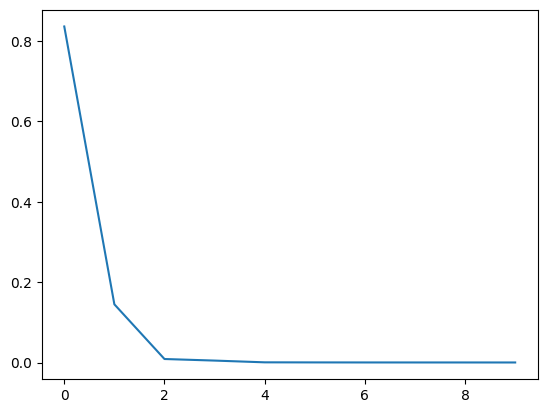

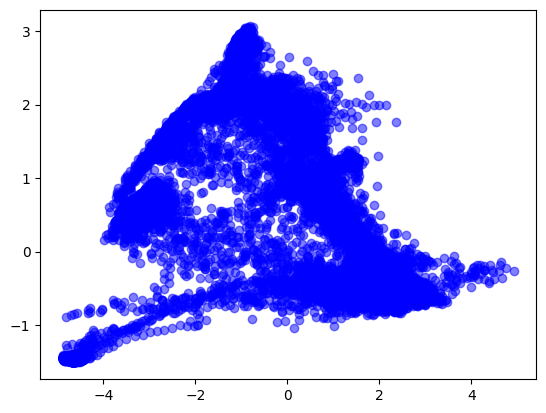

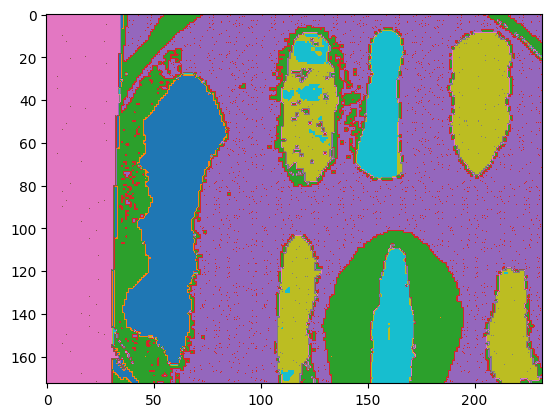

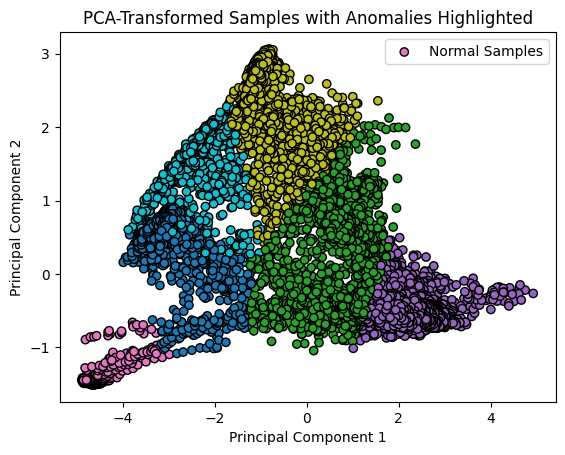

In [20]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

if __name__ == '__main__':
    fname = 'd01_frame_I300'
    #fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    
    data = record['data']
    X = np.reshape(data, (-1, data.shape[-1]))

    n_components = 10
    pca = PCA(n_components=n_components).fit(X)
    plt.plot(pca.explained_variance_ratio_)
    plt.show()

    
    pca = PCA(n_components=n_components).fit_transform(X)
    plt.scatter(pca[:, 0], pca[:, 1], c='blue', alpha=0.5)
    plt.show()

    n_clusters = 6
    clustering = KMeans(n_clusters=n_clusters).fit(X)
    
    plt.figure('All labels')
    labels2 = np.reshape(clustering.labels_, data.shape[:2])
    plt.imshow(labels2, cmap=plt.cm.tab10)
    plt.show()

    plt.scatter(pca[:, 0], pca[:, 1], c=labels2, cmap=plt.cm.tab10, label='Normal Samples', edgecolor='k')
    plt.title('PCA-Transformed Samples with Anomalies Highlighted')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    #print(sorted(X_pca, key=lambda i: X_pca[i, 1]))
    plt.show()
    
    